# The Computing Miniproject

It's time to do something concrete with all the computational biology techniques you have been learning.

The computing Miniproject gives you an opportunity to try the "whole nine yards" of *asking and answering* a scientific question in biology (potentially involving multiple sub-questions/hypotheses) in a **fully reproducible way**. It will in essence give you an opportunity to perform a useful "dry run" of executing your actual Dissertation project.

## Objectives

**The general question you will address is:** *What mathematical models best fit an empirical dataset?*

You may think of this as testing a set of alternative hypotheses — every alternative hypothesis is nothing but a different model to describe an observed phenomenon, as you will have learned in the model fitting lectures.

## The Project 

From the options provided to you (below), you will choose an empirical dataset, and a set of alternative models to fit to the data in that dataset.

The Miniproject must satisfy the following criteria (and follow the accompanying guidelines):

1. **It employs *as many* of the biological computing tools you have learned so far as necessary**: shell (bash) scripting, Git, LaTeX, R, and Python. Using these tools, you will build a workflow that starts with the data and ends with a written report (in LaTeX). How you choose the different tools (e.g., how much Python vs R) is your choice; that is part of what will be assessed.

2. **Fits and compares *at least* two alternative mathematical models to the data**. The models should be fitted and selected using an appropriate method. For example you may use a combination of Ordinary Linear and Nonlinear Least Squares (NLLS) methods to fit $\ge 2$ alternative models to data, followed by model selection using AIC and BIC (read the Johnson and Omland 2005 paper in the Readings & Resources section below).*

3. **The project should be fully reproducible.** You will write a script that "glues" the workflow together and runs it, from data processing, to model fitting, to plotting, to compilation of the written report (*More detailed instructions on report below*). Refer back to the TheMulQuaBio Computing chapters to see how you would run the different components. For example, we have covered how to run R and compile $\LaTeX$ using the `subprocess` module in the [second Python Chapter](./06-Python_II.ipynb). The assessor should be able to run just this script to get everything to work without errors. 

*You will be given lectures and practicals on model fitting before you start on your Miniproject.*

*Please read the papers in the **Readings and Resources** section below* — these will help orient you in the right direction for tackling your Miniproject.


## The Report

The report should,

* be written in LaTeX using the article document class, in 11pt (any font will do, within reason!).

* be 1.5-spaced, with *continuous* line numbers.

* have a Title, Author name with Affiliation and Word count on a *separate Title page*.

* have an Introduction with objectives of the study, and appropriate additional sections such as Methods, Data, Results, Discussion, etc.

* contain in the *Methods* a sub-section called "Computing tools" which states briefly how each of the scripting languages (bash, R, Python) was used and what packages within them were used and a justification of why.

* have References properly cited in text and formatted in a list using bibtex.

* contain $\leq$3500 words *excluding the contents of the title page, references, and Figure or Table captions+legends*. There should be a word count at the beginning of the document (typically using the `texcount` package).

For the Report, you should read the *general* (*not* word count, formatting etc.) dissertation writing guidelines given in the Silwood Masters Student Guidebook.

## Submission

Add, commit and push all your work to your bitbucket repository using a directory called `MiniProject` at the same level as the Week1, Week2 etc. directories, by the Miniproject deadline given to you.

At this stage, you are not going to be told you how to organize your project — that's part of the marking criteria (see next section).

## Marking criteria

*Equal weightage will be given to the code+workflow and writeup components — each component will be marked to a max of 100 pts and then rescaled to a single mark / 100 using equal weightage*

The assessor will be looking for the following while assessing your submission:

* A well-organized project where code, results, data, etc., are easy to locate, inspect, and use. In the project's README also include:

    * Version of each language used

    * Any dependencies or special packages the user/marker should be aware of

    * What each package you used is for

* A project that runs smoothly and efficiently, without any errors once a single script is called. The single script should be called *run_MiniProject*, with an appropriate extension (e.g., `run_MiniProject.py` or `run_MiniProject.sh`).

* A report that contains all the components indicated above in "The Report" subsection, with some original thought and synthesis in the *Introduction* and *Discussion* sections.

* Quality of the presentation of the graphics and tables in your report, as well as any plots showing model fits to the data.

* The marking criteria you may refer to is the [summative marking criteria](https://github.com/mhasoba/TheMulQuaBio/raw/master/content/readings/MARKING_CRITERIA.pdf).

## The Dataset and Model Options

You can pick from one of the following three sets of options. 

First, let's load some packages to explore the data sets in Python: 

In [1]:
import pandas as pd
import scipy as sc
import matplotlib.pylab as pl
import seaborn as sns # You might need to install this (e.g., pip install seaborn)

### Functional Responses

#### The Question 

*How well do different mathematical models, e.g., based upon foraging theory (mechanistic) principles  vs. phenomenological ones, fit to functional responses data across species?*

In ecological parlance, a functional response is the relationship between a consumer's (e.g., predator) biomass consumption rate and abundance of the target resource (e.g., prey). Functional responses arise from fundamental biological and physical constraints on consumer-resource interactions (e.g., Holling 1959, Pawar et al, 2012), and determine the rate of biomass flow between species in ecosystems across the full scale of sizes, from the smallest (e.g., microbes) to the largest (e.g., blue whales). Functional responses also play a key sole in determining the stability (responses to perturbations) of the food webs that underpin ecosystems.

#### The Data

The dataset is called `CRat.csv`. It contains measurements of rates of consumption of a single resource (e.g., prey, plants) species' by a consumer species (e.g., predators, grazers). These data were collected through lab and field experiments across the world. The field names are defined in a file called `BiotraitsTemplateDescription.pdf`, also in the `data` directory. The two main fields of interest are `N_TraitValue` (The number of resources consumed per consumer per unit time), and `ResDensity` (the resource abundance). Individual functional response curves can be identified by `ID` values --- each `ID` corresponds to one curve. Or you can reconstruct them as unique combinations of `Citation` (where the functional response dataset came from), `ConTaxa` (consumer species ID), `ResTaxa` (resource species ID).

Let's have a look at the data:

In [12]:
data = pd.read_csv("../data/CRat.csv")
print("Loaded {} columns.".format(len(data.columns.values)))

Loaded 68 columns.


In [13]:
data.head()

,ID,DataType,ORIGINAL_TraitID,ORIGINAL_TraitDefinition,TraitValue,TraitUnit,N_TraitValue,ConTaxa,ResTaxa,ConTaxaStage,...,ConSizType,CON_ORIGINAL_value,CON_ORIGINAL_unit,Con_Siz_reference,ResSizType,RES_ORIGINAL_value,RES_ORIGINAL_unit,Res_Siz_reference,Citation,FigureTable
0,39835,new,Resource Consumption Rate,The number of resource consumed per number of ...,8.67993,Individual/(Individual*120 mins),0.001206,Cyclops bicuspidatus Claus 1857,Panagrolaimus spp.,Cyclops bicuspidatus Claus 1857 [adult],...,dry mass,6.23E-009,kilogram,original,dry mass,6.000000e-11,kilogram,original,[91] Muschiol D. et al. Predator-prey relation...,Fig 1
1,39835,new,Resource Consumption Rate,The number of resource consumed per number of ...,7.66727,Individual/(Individual*120 mins),0.001065,Cyclops bicuspidatus Claus 1857,Panagrolaimus spp.,Cyclops bicuspidatus Claus 1857 [adult],...,dry mass,6.23E-009,kilogram,original,dry mass,6.000000e-11,kilogram,original,[91] Muschiol D. et al. Predator-prey relation...,Fig 1
2,39835,new,Resource Consumption Rate,The number of resource consumed per number of ...,8.67993,Individual/(Individual*120 mins),0.001206,Cyclops bicuspidatus Claus 1857,Panagrolaimus spp.,Cyclops bicuspidatus Claus 1857 [adult],...,dry mass,6.23E-009,kilogram,original,dry mass,6.000000e-11,kilogram,original,[91] Muschiol D. et al. Predator-prey relation...,Fig 1
3,39835,new,Resource Consumption Rate,The number of resource consumed per number of ...,18.44480,Individual/(Individual*120 mins),0.002562,Cyclops bicuspidatus Claus 1857,Panagrolaimus spp.,Cyclops bicuspidatus Claus 1857 [adult],...,dry mass,6.23E-009,kilogram,original,dry mass,6.000000e-11,kilogram,original,[91] Muschiol D. et al. Predator-prey relation...,Fig 1
4,39835,new,Resource Consumption Rate,The number of resource consumed per number of ...,17.35990,Individual/(Individual*120 mins),0.002411,Cyclops bicuspidatus Claus 1857,Panagrolaimus spp.,Cyclops bicuspidatus Claus 1857 [adult],...,dry mass,6.23E-009,kilogram,original,dry mass,6.000000e-11,kilogram,original,[91] Muschiol D. et al. Predator-prey relation...,Fig 1


In [14]:
print(data.columns.values)

['ID' 'DataType' 'ORIGINAL_TraitID' 'ORIGINAL_TraitDefinition'
 'TraitValue' 'TraitUnit' 'N_TraitValue' 'ConTaxa' 'ResTaxa'
 'ConTaxaStage' 'ResTaxaStage' 'Con_ForagingMovement'
 'Con_RESDetectionDimensionality' 'Res_ForagingMovement'
 'Res_CONDetectionDimensionality' 'CON_MASS_value' 'RES_MASS_value'
 'ResArenaSize_SI_UNIT' 'ResDensity_SI_VALUE' 'ResDensityUnit'
 'ResDensity' 'ResArenaSize_SI_VALUE' 'ConTemp' 'ResTemp' 'ResReplaceRate'
 'ResReplaceUnit' 'ResReplace' 'TraitSIValue' 'TraitSIUnit' 'N_TraitID'
 'N_TraitConversion' 'N_CONVERTED' 'N_TraitUnit' 'Original_ErrorValue'
 'Original_ErrorValueUnit' 'Replicates' 'ConTaxon' 'ConStage' 'ConCommon'
 'Con_MovementDimensionality' 'Con_Thermy' 'Res_MovementDimensionality'
 'ResTaxon' 'ResStage' 'ResCommon' 'Res_Thermy' 'Habitat' 'LabField'
 'ObservationtimeSI' 'ObservationtimeSIUnits' 'ConStarvationTimeSI'
 'ConStarvationTimeSIUnits' 'ConArenaSiz_VALUE' 'ConArenaSize_UNIT'
 'ConDensity' 'ConDensityUnit' 'ConDensity_SI_VALUE' 'ConDensityC

In [15]:
print(data.TraitUnit.unique()) #units of the response variable 

['Individual/(Individual*120 mins)' 'Individual/(Individual*90 mins)'
 'individual / (individual * second)'
 'individual / (5 individual * 24 hrs)'
 'individual / (1 individual * 3 hrs)'
 'individual / (1 individual * 5 hrs)'
 'individual / (1 individual * 8 hrs)'
 'individual / (1 individual * 6 hrs)'
 'individual / (1 individual * 24 hrs)'
 'individual / (1 individual *12 hrs)'
 'individual / (1 individual *24 hrs)'
 'individual / (1 individual *2 hrs)'
 'milligram (body mass - dry) / (sqrt (gram (body mass - wet)) * 1 minute)'
 'individual / (1 individual *3 hrs)'
 'cubic micrometer (yeast cell wet volume) / (gram (body mass - wet) * 1 hour)'
 'individual / (1 individual *30 mins)' 'individual / (1 individual *day)'
 'individual / (1 individual * hr)'
 'gram (biomass - dry) / (individual * 1 minute)'
 'Individual/(Individual*1 mins)' 'Individual/(Individual*1 hr)'
 'Individual/(Individual*1 day)'
 'gram (biomass - wet) / (individual * 3 hrs)'
 'Individual/(Individual * 1 hr)' 'Indiv

In [16]:
print(data.ResDensityUnit.unique()) #units of the independent variable 

['Individuals per arena' 'g (body - dry) per square meter'
 'cubic micrometer (yeast wet cell biovolume) per milliliter'
 'Individuals per liter' 'Individuals per cubic centimeter'
 'kg (body - dry) per hectare' 'Individuals per square meter'
 'Individuals per microliter' 'g (body - wet) per square meter'
 'individuals per arena' 'individuals per square km'
 'mg (body - dry) per square cm' 'individuals per Liter'
 'mg (Carbon) per liter'
 'cubic micrometer (wet cell biovolume) per milliliter'
 'individuals per .15 ha' 'microgram (Carbon) per liter'
 'Individuals per ml' 'microgram (chlorophyll a weight) per liter'
 'Individuals per milliliter' 'Individuals per 1 ha'
 'Individuals per cubic meter' 'Individuals per 100 ha'
 'individual per milliliter (1)' 'individual per arena (1)'
 'individual per liter (1)']


In [17]:
print(data.ID.unique()) #units of the independent variable 

[39835 39836 39837 39838 39839 39840 39841 39842 39843 39844 39845 39846
 39847 39848 39849 39850 39851 39852 39853 39854 39855 39856 39857 39858
 39859 39860 39861 39862 39863 39864 39865 39866 39867 39868 39869 39870
 39871 39873 39874 39875 39876 39877 39878 39879 39880 39881 39882 39883
 39884 39885 39886 39887 39888 39889 39890 39891 39892 39893 39894 39895
 39896 39897 39898 39899 39900 39901 39902 39903 39904 39905 39906 39907
 39908 39909 39910 39911 39912 39913 39914 39915 39916 39917 39918 39919
 39920 39921 39922 39923 39924 39925 39926 39927 39928 39929 39931 39932
 39933 39934 39935 39936 39937 39938 39939 39940 39941 39942 39943 39944
 39945 39946 39947 39948 39949 39950 39951 39952 39953 39954 39955 39956
 39957 39958 39959 39960 39961 39962 39963 39964 39965 39966 39967 39968
 39969 39970 39971 39972 39973 39974 39975 39976 39977 39978 39979 39980
 39981 39982 39983 39984 39985 39986 39987 39988 39989 39990 39991 39992
 39993 39994 39995 39996 39997 39998 39999 40000 40

In [18]:
data_subset = data[data['ID']==39982]
data_subset.head()

,ID,DataType,ORIGINAL_TraitID,ORIGINAL_TraitDefinition,TraitValue,TraitUnit,N_TraitValue,ConTaxa,ResTaxa,ConTaxaStage,...,ConSizType,CON_ORIGINAL_value,CON_ORIGINAL_unit,Con_Siz_reference,ResSizType,RES_ORIGINAL_value,RES_ORIGINAL_unit,Res_Siz_reference,Citation,FigureTable
1552,39982,new,Resource Consumption Rate,The number of resource consumed per number of ...,15.3020,Individual/(Individual * 1 hr),0.004251,Mediomastus fragile Rasmussen 1973,Isochrysis galbana Parke,Mediomastus fragile Rasmussen 1973 [larva],...,body volume,2500000,cubic micrometer,original,cell diameter,4.56,micrometer,original,Hansen B. 1993. ASPECTS OF FEEDING GROWTH AND ...,Fig 6
1553,39982,new,Resource Consumption Rate,The number of resource consumed per number of ...,17.6631,Individual/(Individual * 1 hr),0.004906,Mediomastus fragile Rasmussen 1973,Isochrysis galbana Parke,Mediomastus fragile Rasmussen 1973 [larva],...,body volume,2500000,cubic micrometer,original,cell diameter,4.56,micrometer,original,Hansen B. 1993. ASPECTS OF FEEDING GROWTH AND ...,Fig 6
1554,39982,new,Resource Consumption Rate,The number of resource consumed per number of ...,50.1713,Individual/(Individual * 1 hr),0.013936,Mediomastus fragile Rasmussen 1973,Isochrysis galbana Parke,Mediomastus fragile Rasmussen 1973 [larva],...,body volume,2500000,cubic micrometer,original,cell diameter,4.56,micrometer,original,Hansen B. 1993. ASPECTS OF FEEDING GROWTH AND ...,Fig 6
1555,39982,new,Resource Consumption Rate,The number of resource consumed per number of ...,47.9275,Individual/(Individual * 1 hr),0.013313,Mediomastus fragile Rasmussen 1973,Isochrysis galbana Parke,Mediomastus fragile Rasmussen 1973 [larva],...,body volume,2500000,cubic micrometer,original,cell diameter,4.56,micrometer,original,Hansen B. 1993. ASPECTS OF FEEDING GROWTH AND ...,Fig 6
1556,39982,new,Resource Consumption Rate,The number of resource consumed per number of ...,78.3936,Individual/(Individual * 1 hr),0.021776,Mediomastus fragile Rasmussen 1973,Isochrysis galbana Parke,Mediomastus fragile Rasmussen 1973 [larva],...,body volume,2500000,cubic micrometer,original,cell diameter,4.56,micrometer,original,Hansen B. 1993. ASPECTS OF FEEDING GROWTH AND ...,Fig 6


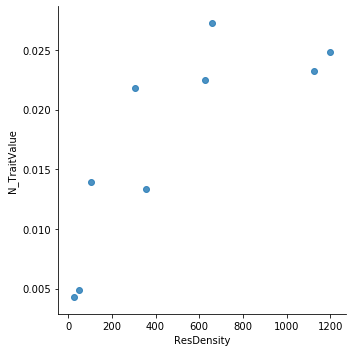

In [19]:
sns.lmplot("ResDensity", "N_TraitValue", data=data_subset, fit_reg=False)

#### The Models

*All the following parameters and variables are in SI units*.

The fundamental measure of interest (the response variable) is consumption rate ($c$). This is expressed in terms of biomass quantity or number of individuals of resource consumed *per unit time per unit consumer* (so units of Mass (or Individuals) / Time). 

Again, the simplest mathematical models you can use are the phenomenological quadratic and cubic polynomial models, that is eqns. \ref{eq:quad} and \ref{eq:cubic} (replace $x$ with resource abundance).

Then, there is the more mechanistic Holling Type II model (Holling, 1959):

$$\label{eq:FR_II}
      c = \frac{a x_R}{1 + h a x_R}
$$

Here, $x_R$ is resource density (Mass / Area or Volume), $a$ is consumer's search rate (Area or Volume / Time ), and  $h$ is handling time of the consumer for that resource (time taken to overpower and ingest it). 

Below is an example FR curve from the dataset you have been given with the Type II model fitted to it.  

---
![image](./graphics/3_FR.svg)
<small>  <center> Example of the a Type II model (eqn. \ref{eq:FR_II}) fitted to a functional response of a consumer on a resource. 
</center> </small>

---

There is also the less-mechanistic "generalized" functional response model:  

$$\label{eq:FR_gen}
      c = \frac{a x_R^{q + 1}}{1 + h a x_R^{q + 1}}
$$
	   
Where everything is same as \ref{eq:FR_II}, but the additional parameter $q$ (dimensionless) is a shape parameter that allows the shape of the response to be more flexible/variable, from "Type I" to "Type III". This model is less mechanistic because it includes a phenomenological parameter $q$ which does not have a formal biological meaning. Note that if $q=0$, eqn (\ref{eq:FR_gen} becomes same as the Type II model (eqn. \ref{eq:FR_II})). 

---
![image](./graphics/FR.svg)
<small> <center> The range of functional responses captured by the generalized functional response model (eqn. \ref{eq:FR_gen}). 
</center>
</small>

---

There are other models for functional responses as well (some more mechanistic), that define parameters of the functional response in terms of body size of predator and prey (Pawar et al 2012).  


### Population Growth

#### The Question 

*How well do different mathematical models, e.g., based upon population growth (mechanistic) theory  vs. phenomenological ones, fit to functional responses data across species?*

Fluctuations in the abundance (density) of single populations may play a crucial role in ecosystem dynamics and emergent functional characteristics, such as rates of carbon fixation or disease transmission. A population grows exponentially while its abundance is low and resources are not limiting (the Malthusian principle). This growth then slows and eventually stops as resources become limiting. There may also be a time lag before the population growth really takes off at the start. We will focus on microbial (specifically, bacterial) growth rates. Bacterial growth in batch culture follows a distinct set of phases; lag phase, exponential phase and stationary phase. During the lag phase a suite of transcriptional machinery is activated, including genes involved in nutrient uptake and metabolic changes, as bacteria prepare for growth. During the exponential growth phase, bacteria divide at a constant rate, the population doubling with each generation. When the carrying capacity of the media is reached, growth slows and the number of cells in the culture stabilises, beginning the stationary phase. Traditionally, microbial growth rates were measured by plotting cell numbers or culture density against time on a semi-log graph and fitting a straight line through the exponential growth phase &ndash; the slope of the line gives the maximum growth rate ($r_{max}$). Models have since been developed which we can use to describe the whole sigmoidal bacterial growth curve. 

#### The Data

The dataset is called `LogisticGrowthData.csv`. It contains measurements of change in biomass or number of cells of microbes over time. These data were collected through lab experiments across the world. The field names are defined in a file called  `LogisticGrowthMetaData.csv`, also in the `data` directory. The two main fields of interest are `PopBio` (abundance), and `Time`. Single population growth rate curves can be identified by as unique  temperature-species-medium-citation-replicate combinations (concatenate them to get a new string variable that identifies unique growth curves).

Let's have a look at the data:

In [20]:
data = pd.read_csv("../data/LogisticGrowthData.csv")
print("Loaded {} columns.".format(len(data.columns.values)))

Loaded 10 columns.


In [21]:
print(data.columns.values)

['X' 'Time' 'PopBio' 'Temp' 'Time_units' 'PopBio_units' 'Species' 'Medium'
 'Rep' 'Citation']


In [22]:
pd.read_csv("../data/LogisticGrowthMetaData.csv")

,Time,Time at which measurement was taken.
0,PopBio,Population or biomass measurement.
1,Temp,Temperature at which the microbe was grown (de...
2,Time_units,Units time is measured in.
3,PopBio_units,Units population or biomass are measured in.
4,Species,Species or strain used.
5,Medium,Medium the microbe was grown in.
6,Rep,Replicate within the experiment.
7,Citation,Citation for the paper in which the study was...


In [23]:
data.head()

,X,Time,PopBio,Temp,Time_units,PopBio_units,Species,Medium,Rep,Citation
0,1,669.879518,0.283276,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
1,2,646.987952,0.283342,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
2,3,622.891566,0.285151,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
3,4,597.590361,0.281746,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
4,5,574.698795,0.273117,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."


In [24]:
print(data.PopBio_units.unique()) #units of the response variable 

['OD_595' 'N' 'CFU' 'DryWeight']


In [25]:
print(data.Time_units.unique()) #units of the independent variable 

['Hours']


Unlike the previous two datasets there are no ID coulmns, so you will have to  infer single growth curves by combining `Species`, `Medium`, `Temp` and `Citation` columns (each species-medium-citation combination is unique):

In [26]:
data.insert(0, "ID", data.Species + "_" + data.Temp.map(str) + "_" + data.Medium + "_" + data.Citation)

Note that the `map()` method coverts temperature values to string (`str`) for concatenation.

In [27]:
print(data.ID.unique()) #units of the independent variable 

['Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.'
 'Enterobacter.sp._5_TSB_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.'
 'Pantoea.agglomerans.1_5_TSB_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.'
 'Pantoea.agglomerans.2_5_TSB_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food s

These are rather ungainly IDs, so you might want to replace them with numbers!

In [28]:
data_subset = data[data['ID']=='Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., Heu, S. and Lee, S.Y., 2014. Growth characteristics and biofilm formation of various spoilage bacteria isolated from fresh produce. Journal of food science, 79(10), pp.M2072-M2080.']
data_subset.head()

,ID,X,Time,PopBio,Temp,Time_units,PopBio_units,Species,Medium,Rep,Citation
0,"Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...",1,669.879518,0.283276,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
1,"Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...",2,646.987952,0.283342,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
2,"Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...",3,622.891566,0.285151,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
3,"Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...",4,597.590361,0.281746,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."
4,"Chryseobacterium.balustinum_5_TSB_Bae, Y.M., Z...",5,574.698795,0.273117,5,Hours,OD_595,Chryseobacterium.balustinum,TSB,1,"Bae, Y.M., Zheng, L., Hyun, J.E., Jung, K.S., ..."


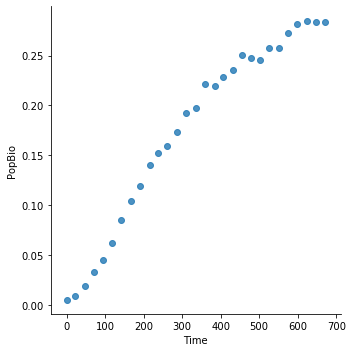

In [29]:
sns.lmplot("Time", "PopBio", data = data_subset, fit_reg = False) # will give warning - you can ignore it

#### The Models

Yet again, the simplest mathematical models you can use are the phenomenological quadratic and cubic polynomial models, that is eqns. 1 and 2 above (replace $x$ with Time). A Polynomial model may be able to capture decline in population size after some maximum value (the carrying capacity) has been reached (the "death phase" of population growth).For mechanistic models of population, growth, have a look at the Model fitting notebook's [section on this](./Appendix-ModelFitting.ipynb#Population-growth-rate-example).

---

![image](./graphics/Pop_Grow.svg)
<small> <center> An example population growth curve dataset to which the modified Gompertz model (Zwietering et. al., 1990) has been fitted.
</center></small>

(See the [Model fitting notebook](./20-ModelFitting.ipynb) for more information)

---

### Thermal Performance Curves

#### The Question 

*How well do different mathematical models, e.g., based upon biochemical (mechanistic) principles  vs. phenomenological ones, fit to the thermal responses of metabolic traits?*

This is currently a "hot" (no pun intended!) topic in biology. On the *ecological side*, because the temperature-dependence of metabolic rate sets the rate of intrinsic $r_\text{max}$ (papers by Savage et al., Brown et al.) as well as interactions between species, it has a strong effect on population dynamics. In this context, note that 99.9% of life on earth is ectothermic! On the *evolutionary side*, the temperature-dependence of fitness and species interactions also means that warmer environments may have stronger rates of evolution. This may be compounded by the fact that mutation rates may also increase with temperature (papers by Gillooly et al.).

#### The Data

The dataset is called `ThermRespData.csv`. It contains a subset of the full "BioTraits" database. This subset contains hundreds of "thermal responses" for growth, respiration and photosynthesis rates in plants and bacteria (both aquatic and terrestrial). These data were collected through lab experiments across the world, and compiled by various people over the years. The field names are defined in a file called `BiotraitsTemplateDescription.pdf`, also in the `data` directory. The two main fields of interest are `OriginalTraitValue` (the trait values responding to temperature), and `ConTemp` (the temperature). Individual thermal response curves can be identified by `ID` values --- each `ID` corresponds to one thermal performance curve.

Let's have a look at the data:

In [3]:
data = pd.read_csv("../data/ThermRespData.csv")
print("Loaded {} columns.".format(len(data.columns.values)))

Loaded 78 columns.


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (8,9,37,41,44,55,58,59,63,71) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head()

,Input,ID,OrignalTraitName,OriginalTraitDef,StandardisedTraitName,StandardisedTraitDef,OriginalTraitValue,OriginalTraitUnit,OriginalErrorPos,OriginalErrorNeg,...,AcclimVarTempUnit,AcclimVarTempDur,AcclimVarTempDurUnit,LabGrowthTemp,LabGrowthTempUnit,LabGrowthDur,LabGrowthDurUnit,Citation,FigureTable,Notes
0,Richard,1,photosynthetic co2 assimilation,NaN,net photosynthesis rate,NaN,9.876141,micromol m^-2 s^-1,NaN,NaN,...,NaN,NaN,NaN,19,Celsius,NaN,NaN,"Sharkey, T. D., & Loreto, F. (1993). Water str...",3,leaves 2 weeks past full extension
1,Richard,1,photosynthetic co2 assimilation,NaN,net photosynthesis rate,NaN,11.743801,micromol m^-2 s^-1,NaN,NaN,...,NaN,NaN,NaN,19,Celsius,NaN,NaN,"Sharkey, T. D., & Loreto, F. (1993). Water str...",3,leaves 2 weeks past full extension
2,Richard,1,photosynthetic co2 assimilation,NaN,net photosynthesis rate,NaN,10.582731,micromol m^-2 s^-1,NaN,NaN,...,NaN,NaN,NaN,19,Celsius,NaN,NaN,"Sharkey, T. D., & Loreto, F. (1993). Water str...",3,leaves 2 weeks past full extension
3,Richard,1,photosynthetic co2 assimilation,NaN,net photosynthesis rate,NaN,6.508309,micromol m^-2 s^-1,NaN,NaN,...,NaN,NaN,NaN,19,Celsius,NaN,NaN,"Sharkey, T. D., & Loreto, F. (1993). Water str...",3,leaves 2 weeks past full extension
4,Richard,1,photosynthetic co2 assimilation,NaN,net photosynthesis rate,NaN,2.664421,micromol m^-2 s^-1,NaN,NaN,...,NaN,NaN,NaN,19,Celsius,NaN,NaN,"Sharkey, T. D., & Loreto, F. (1993). Water str...",3,leaves 2 weeks past full extension


In [5]:
print(data.columns.values)

['Input' 'ID' 'OrignalTraitName' 'OriginalTraitDef'
 'StandardisedTraitName' 'StandardisedTraitDef' 'OriginalTraitValue'
 'OriginalTraitUnit' 'OriginalErrorPos' 'OriginalErrorNeg'
 'OriginalErrorUnit' 'StandardisedTraitValue' 'StandardisedTraitUnit'
 'StandardisedErrorPos' 'StandardisedErrorNeg' 'StandardisedErrorUnit'
 'Replicates' 'Consumer' 'ConCommon' 'Habitat' 'Location' 'LocationType'
 'LocationDate' 'CoordinateType' 'Latitude' 'Longitude' 'ConThermy'
 'ConStage' 'ConSize' 'ConSizeUnit' 'ConSizeType' 'ConDenValue'
 'ConDenUnit' 'ConTemp' 'ConTempUnit' 'ConTempMethod' 'Labfield' 'Labtemp'
 'Labtempunit' 'Labtime' 'Labtimeunit' 'ArenaValue' 'ArenaUnit'
 'AmbientTemp' 'AmbientTempUnit' 'AmbientLight' 'AmbientLightUnit'
 'Resource' 'ResCommon' 'ResStage' 'ResThermy' 'ResTemp' 'ResTempMethod'
 'ResSize' 'ResSizeUnit' 'ResDenValue' 'ResDenUnit' 'ResRepValue'
 'ResRepUnit' 'ObsTimeValue' 'ObsTimeUnit' 'EquilibTimeValue'
 'EquilibTimeUnit' 'AcclimFixTemp' 'AcclimFixTempUnit' 'AcclimFixTe

In [6]:
print(data.OriginalTraitUnit.unique()) #units of the response variable 

['micromol m^-2 s^-1' 'mg o2 (10 minutes^-1)' 'micromol o2 dm^-2 min^-1'
 'mg co2 dm^-2 h^-1' 'micromol co2 mg(Chl)^-1 h^-1' 'micro (day^-1)'
 '% of maximum' 'mg co2 g(FW)^-1 h^-1' 'ng co2 cm^-2 s^-1' 'gh^-1 m^-2'
 'nmol g^-1 s^-1' 'mg co2 g^-1 h^-1' 'nmol co2 cm^-2 s^-1'
 'micromol co2 m^-2 s^-1' 'micromol o2 mg(Chl)^-1 h^-1'
 'micromol co2 kg^-1 s^-1' 'mg co2 g(DW)^-1 h^-1'
 'micromol o2 g(DW)^-1 min^-1' 'mg C g(DW)^-1 h^-1' 'mg o2 g(DW)^-2 h^-1'
 'microg co2 m^-2 s^-1' 'micromol o2 g^-1 h^-1'
 'microg co2 g(DW)^-1 min^-1' 'microl o2 g(DW)^-1 (10 minutes)^-1'
 'mg co2 m^-2 s^-1' 'micromol o2 mg(Chl)^-1 min^-1'
 'mg o2 10^-9 cells hour^-1' 'mmol e^- [mg chl a]^-1 h^-1'
 'microg o2 mg(Chl)^-1 min^-1' 'dpm 14C per 10^3 cells' 'mmol kg^-1 h^-1'
 'microg C cm^-2 h^-1' 'g co2 m^-2 h^-1' 'microl co2 m^-2 s^-1'
 'nmol cm^-2 s^-1' 'micromol co2 g(FW)^-1 h^-1' '?'
 'micromol mg(Chl a)^-1 h^-1' 'micromol g(DW)^-1 h^-1' 'g o2 cm^-2 h^-1'
 'microg o2 cm^-2 h^-1' '%' 'micromol o2 mg(Chl a)^-1 h^-1

In [7]:
print(data.ConTempUnit.unique()) #units of the independent variable 

['celsius' 'Celsius']


In [8]:
print(data.ID.unique()) #units of the independent variable 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [9]:
data_subset = data[data['ID']==110]
data_subset.head()

,Input,ID,OrignalTraitName,OriginalTraitDef,StandardisedTraitName,StandardisedTraitDef,OriginalTraitValue,OriginalTraitUnit,OriginalErrorPos,OriginalErrorNeg,...,AcclimVarTempUnit,AcclimVarTempDur,AcclimVarTempDurUnit,LabGrowthTemp,LabGrowthTempUnit,LabGrowthDur,LabGrowthDurUnit,Citation,FigureTable,Notes
800,Richard,110,net photosynthesis,NaN,net photosynthesis rate,NaN,2.510253,mg co2 g^-1 h^-1,NaN,NaN,...,NaN,NaN,NaN,"27.5,20",celsius,NaN,NaN,"Harley, P. C., Tenhunen, J. D., Murray, K. J.,...",3,NaN
801,Richard,110,net photosynthesis,NaN,net photosynthesis rate,NaN,3.607141,mg co2 g^-1 h^-1,NaN,NaN,...,NaN,NaN,NaN,"27.5,20",celsius,NaN,NaN,"Harley, P. C., Tenhunen, J. D., Murray, K. J.,...",3,NaN
802,Richard,110,net photosynthesis,NaN,net photosynthesis rate,NaN,4.380516,mg co2 g^-1 h^-1,NaN,NaN,...,NaN,NaN,NaN,"27.5,20",celsius,NaN,NaN,"Harley, P. C., Tenhunen, J. D., Murray, K. J.,...",3,NaN
803,Richard,110,net photosynthesis,NaN,net photosynthesis rate,NaN,4.891680,mg co2 g^-1 h^-1,NaN,NaN,...,NaN,NaN,NaN,"27.5,20",celsius,NaN,NaN,"Harley, P. C., Tenhunen, J. D., Murray, K. J.,...",3,NaN
804,Richard,110,net photosynthesis,NaN,net photosynthesis rate,NaN,4.735478,mg co2 g^-1 h^-1,NaN,NaN,...,NaN,NaN,NaN,"27.5,20",celsius,NaN,NaN,"Harley, P. C., Tenhunen, J. D., Murray, K. J.,...",3,NaN


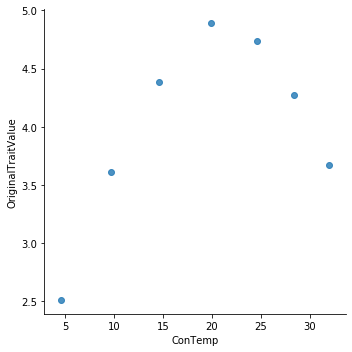

In [11]:
sns.lmplot("ConTemp", "OriginalTraitValue", data=data_subset, fit_reg=False)

#### The Models

*All the following parameters and variables are in SI units*.

There are multiple models that might best describe these data. The simplest are the general quadratic and cubic polynomial models:

$$\label{eq:quad}
    B = B_0 + B_1 x + B_2 x^2
$$


$$\label{eq:cubic}
    B = B_0 + B_1 x + B_2 x^2 + B_3 x^3
$$

These are phenomenological models, with the parameters $B_0$, $B_1$, $B_2$ and $B_3$ lacking any mechanistic interpretation. $x$ is the independent variable (in this case Temperature, $T$) 

Another phenomenological model option is the Briere model:

$$B = B_0 T (T-T_0) \sqrt{T_m-T}$$

Where $T$ is temperature, $T_0$ and $T_m$ are the minimum and maximum feasible temperatures for the trait (below or above which the traits goes to zero), and $B_0$ is a normalization constant.  

In contrast, the Schoolfield model (Schoolfield et al 1981) is a mechanistic option that is based upon thermodynamics and enzyme kinetics:

$$\label{eq:schoolf}
    B = \frac{B_0 e^{\frac{-E}{k} (\frac{1}{T} - \frac{1}{283.15})}}
    { 1 + e^{\frac{E_l}{k} (\frac{1}{T_l} - \frac{1}{T})} + 
    e^{\frac{E_h}{k} (\frac{1}{T_h} - \frac{1}{T})}}
$$

*Please also have a look at the Delong et al 2017 paper, which lists this and other mechanistic TPC models* (see [Readings](#Readings)). You may choose additional models listed in that paper for comparison, if you want.

Here, $k$ is the Boltzmann constant ($8.617 \times 10^{-5}$ eV $\cdot$ K$^{-1}$), $B$ the value of the trait at a given temperature $T$ (K) (K = $^\circ$C + 273.15), while $B_0$ is the trait value at 283.15 K (10$^\circ$C) which stands for the value of the growth rate at low temperature and controls the vertical offset of the curve. $E_l$ is the enzyme's low-temperature de-activation energy (eV) which controls the behavior of the enzyme (and the curve) at very low temperatures, and $T_l$ is the at which the enzyme is 50% low-temperature deactivated. $E_h$ is the
enzyme's high-temperature de-activation energy (eV) which controls the behavior of the enzyme (and the curve) at very high temperatures, and $T_h$ is the at which the enzyme is 50% high-temperature deactivated. $E$ is the activation energy (eV) which controls the rise of the curve up to the peak in the "normal operating range" for the enzyme (below the peak of the curve and above $T_h$).

---
![image](./graphics/SchoolfEx.png)
<small> <center>Example of the Sharpe-Schoolfield eqn, that is,  \ref{eq:quad} and \ref{eq:cubic}, . \ref{eq:schoolf}) fitted to the thermal response curve of a metabolic trait $x$ with resource abundance. 
    </center> </small>

---

In many cases, a simplified Schoolfield model would be more appropriate for thermal response data, because low temperature inactivation is weak, or is undetectable in the data because low-temperature measurements were not made.

$$\label{eq:schoolfH}
      B = \frac{B_0 e^{\frac{-E}{k} (\frac{1}{T} - \frac{1}{283.15})}}
    { 1 +  e^{\frac{E_h}{k} (\frac{1}{T_h} - \frac{1}{T})}}
$$

In other cases, a different simplified Schoolfield model would be more appropriate, because high temperature inactivation was not detectable in the data because measurements were not made at sufficiently high temperatures:

$$\label{eq:schoolfL}
      B = \frac{B_0 e^{\frac{-E}{k} (\frac{1}{T} - \frac{1}{283.15})}}
    { 1 +  e^{\frac{E_l}{k} (\frac{1}{T_l} - \frac{1}{T})}}
$$

Note that the cubic model (Equation \ref{eq:cubic}) has the same number of parameters as the the reduced Schoolfield models (eq. \ref{eq:schoolfH} & \ref{eq:schoolfL}). Also, the temperature parameter ($T$) of the cubic model (Equation \ref{eq:cubic}) is in $^\circ$C, whereas the Temperature parameter in the Schoolfield model is in K.

## Additional models and questions you can tackle

In all three options above, you may try to tackle fitting to additional models you find in the literature. Some Readings have been provided for each of the three data types below. You may choose to tackle some other hypotheses or explore patterns by considering additional covariates. For example, 

*Do different taxa show different functional responses?*

*Does temperature or taxon identity affect which population growth rate model fits best?*

*Do different models fit different types of thermal performance curves (e.g., Photosynthesis vs Respiration)?* 

You may also choose to revisit the results of another paper that has done comparisons of the models you have chosen with your new dataset.

## Suggested Workflow

You will build a workflow that starts with the data and ends with a report written in LaTeX. I suggest the following components and sequence in your workflow (you may choose to do it differently):

### Data preparation script 

First, a script that imports the data and prepares it for Model fitting. This may be in Python or R, and will typically have the following features:

* Creates unique ids so that you can identify unique datasets (e.g., single thermal responses or functional responses). *This may not always be necessary because your data might already contain a field that delineates single curves (e.g., an `ID` field/column)* 
* Deals with missing, and other problematic data values.
* Saves the modified data to one or more csv file(s).


### Model fitting script

A separate script that does the Model fitting. For example, it may have the following features: 

* Opens the (new, modified) dataset from previous step.

* Does model fitting

* Calculates AIC, BIC, R$^{2}$, and other statistical measures of model fit (you decide what you want to include)

* Exports the results to a csv that the [final plotting script](#Final-plotting-script) can read.
 

```{note}
* Some data series (e.g., a single growth rate or functional response curve) may have insufficient data points for fitting a particular model. That is, the number of unique x-axis values is $\le k$, where $k$ is the number of parameters in the model (e.g., a regression line has two parameters). Your model fitting will fail on such datasets, but you can deal with those failures later (e.g., by using the `try` keyword that you have learned in both Python and R chapters). In particular, the model fitting (or estimation of goodness of fit statistics) will fail for datasets with small sample sizes, and you can then filter these datasets *after* the Model fitting script has finished running and you are in the Analysis phase.  
```

### Final plotting and analysis script  

* Next, write a script that imports the results from the previous step and plots every curve with the two (or more) models (or none, if nothing converges) overlaid. 
    * Doing this will help you identify poor fits visually and help you decide whether the model fitting (e.g., using NLLS) can be further optimized. 
    * All plots should be saved in a single separate sub-directory. 

* This script will also perform any analyses of the results of the Model fitting, for example to summarize which model(s) fit(s) best, and address any biological questions involving co-variates.    

### Report compiling script

* Then comes the $\LaTeX$ source code and a (typically, Bash) script that compiles it. 

### A single script to run them all

* Finally, write a script called `run_MiniProject.py` or `run_MiniProject.sh` respectively, which runs the whole project, right down to compilation of the LaTeX  document.


## For NLLS fitting 

**FIRST work through the [example practicals](./20-ModelFitting.ipynb).**

* If you choose `R`, examples are [here](Appendix-ModelFitting.ipynb). 

* If you choose Python for the model fitting component of your workflow, use `lmfit`: 
    * Look up submodules `minimize`, `Parameters`, `Parameter`, and `report_fit`. 
    * *Have a look through* <http://lmfit.github.io/lmfit-py>, especially <http://lmfit.github.io/lmfit-py/fitting.html#minimize> . 
    * You will have to install `lmfit` using `pip` or `easy_install`  (use sudo mode). Lots of examples of using lmfit online.

* You will need to write a script that calculates [starting values](more on this below). 

* You will need to use the `try` keyword because not all runs will converge. *The more data curves you are able to fit, the better — that is part of the challenge*

*One thing to note is that you may need to do the NLLS fitting on the logarithm of the function (and therefore, the data) to facilitate convergence.* (As you did in the [example practicals](./20-ModelFitting.ipynb))

### Obtaining starting values 

The main challenge for NLLS fitting is finding starting values for the parameters. 

Ideally, you should determine starting values specific to each dataset (e.g., every distinct functional response, population growth rate, or thermal performance curve) that you are trying to fit a model to. To do so, understanding how each parameter in the model corresponds to features of the actual data is key. For example, in the Gompertz population growth rate model, your starting values generator would essentially be an algorithm which, for each dataset,   
*  Calculates a starting value for $r_{max}$ by searching for the steepest slope of the growth curve using the first few data points (fitting a straight line using OLS)
* Calculates a starting value of $t_{lag}$ by intersecting the fitted line with the x (time)-axis 
* Calculates a starting value for the asymptote $A$ as the highest data (abundance) value in the dataset. 

In general, a good strategy to optimize fits (and maximize how many datasets are successfully fitted to a non-linear model) is to not sample starting values from a distribution. For example, you can choose a gaussian (high confidence in mean of parameter) or a uniform distribution (low confidence in mean, high confidence in the range of values that the parameter can take) with the mean being the value you inferred from the data.

*We suggest you write a separate script/module/function that calculates starting values for the model parameters.* 


## Getting started 

Doing all this may seem a bit scary at the start. However, if you approach the problem systematically and methodically, you will soon be on your way. 

Here are some suggested first steps to get started:

* Explore the data in R or Python (e.g., using Jupyter). 

* Write a preliminary version of the plotting script without the fitted models overlaid. That will also give you a feel for the data and allow you to see (literally) what shapes the curves can take.

* Explore the models you will be fitting. Basically, be able to plot them. Write them as functions in your Python/R script (you can then re-use these functions in your NLLS fitting script as well). Then do some plotting of the functions (you can suppress or sandbox those code lines for exploratory plotting of the functions in the final product).

* Figure out, using a minimal example (say, with one, "nice-looking" thermal performance, functional response, or population growth curve/dataset) to see how the NLLS fitting package and its commands work. This is your minimal example

* Next, write a loop over all unique datasets (data curves) using the `try` to catch errors in case the fitting doesn't converge.

## Readings & Resources

Many of these papers are in pdf format in the Readings directory on TheMulQuaBio repository.

### General

* Levins, R. (1966) The strategy of model building in population biology. Am. Sci. 54, 421–431.

* Johnson, J. B. & Omland, K. S. (2004) Model selection in ecology and evolution. Trends Ecol. Evol. 19, 101–108.

* Motulsky, H. & Christopoulos A. (2004) Fitting models to biological data using linear and nonlinear regression: a practical guide to curve fitting. Oxford University Press, USA. 

* Bolker, B. M. et al. (2013) Strategies for fitting nonlinear ecological models in R, AD Model Builder, and BUGS. Methods Ecol. Evol. 4, 501–512.
    

### Functional responses

* Holling, C. S. 1959. Some Characteristics of Simple Types of Predation and Parasitism. The Canadian Entomologist 91 (7): 385–98. https://doi.org/10.4039/Ent91385-7.

* Holling, C S. 1966. The Functional Response of Invertebrate Predators to Prey Density. Mem. Entomol. Soc. Canada 48 (48): 1–86.

* Aljetlawi, A. A., E. Sparrevik, and K. Leonardsson. 2004. Prey-predator size-dependent functional response: derivation and rescaling to the real world. J. Anim. Ecol. 73, 239–252.

* Jeschke, J. M.,  M. Kopp & R. Tollrian. 2002. Predator functional responses: Discriminating between handling and digesting prey. Ecol. Monogr. 72, 95–112.

* Pawar, S., A. I. Dell, and V. M. Savage. 2012. Dimensionality of Consumer Search Space Drives Trophic Interaction Strengths. Nature 486 (7404): 485–89. https://doi.org/10.1038/nature11131.

* Pritchard, D. W., R. A. Paterson, H. C. Bovy, and D. Barrios-O'Neill. 2017. frair: an R package for fitting and comparing consumer functional responses. Methods Ecol. Evol. 8, 1528–1534.

### Population Growth

* Zwietering, M. H., I. Jongenburger, F. M. Rombouts, and K. Van't Riet. 1990. Modeling of the Bacterial Growth Curve. Applied and Environmental Microbiology 56 (6): 1875–81.

* Buchanan, R. L., R. C. Whiting, and W. C. Damert. 1997. When Is Simple Good Enough: A Comparison of the Gompertz, Baranyi, and Three-Phase Linear Models for Fitting Bacterial Growth Curves. Food Microbiology 14 (4): 313–26. https://doi.org/10.1006/fmic.1997.0125.

* Grijspeerdt, K. and P. Vanrolleghem. 1999. Estimating the parameters of the Baranyi model for bacterial growth. Food Microbiol. 16, 593–605.

* Micha, P., and M. G. Corradini. 2011. Microbial Growth Curves: What the Models Tell Us and What They Cannot. Critical Reviews in Food Science and Nutrition. https://doi.org/10.1080/10408398.2011.570463.

### Thermal Performance Curves

* Schoolfield, R. M., P. J H Sharpe, and C. E. Magnuson. 1981. Non-Linear Regression of Biological Temperature-Dependent Rate Models Based on Absolute Reaction-Rate Theory. Journal of Theoretical Biology 88 (4): 719–31. https://doi.org/10.1016/0022-5193(81)90246-0.

* Zwietering, M. H.,  J. T de Koos, B. E. Hasenack, J. C. de Witt,  and K. van't Riet. 1991. Modeling of bacterial growth as a function of temperature. Appl. Environ. Microbiol. 57, 1094–101.

* Dell, A. I., S. Pawar, and V. M. Savage. 2011. Systematic Variation in the Temperature Dependence of Physiological and Ecological Traits. Proceedings of the National Academy of Sciences of the United States of America 108 (26): 10591–10596. https://doi.org/doi: 10.1073/pnas.1015178108.

* DeLong, J. P., J. P. Gibert, T. M. Luhring, G. Bachman, B. Reed, A. Neyer, and K. L. Montooth. 2017. The Combined Effects of Reactant Kinetics and Enzyme Stability Explain the Temperature Dependence of Metabolic Rates. Ecology and Evolution 7 (11): 3940–50. https://doi.org/10.1002/ece3.2955.